#### Models

The Model Component in LangChain is a crucial part of the framework, designed to facilitate
interactions with various *language models* and *embedding models*.

It abstracts the complexity of working directly with different LLMs, chat models, and
embedding models, providing a uniform interface to communicate with them. This makes it
easier to build applications that rely on AI-generated text, text embeddings for similarity
search, and retrieval-augmented generation (RAG)

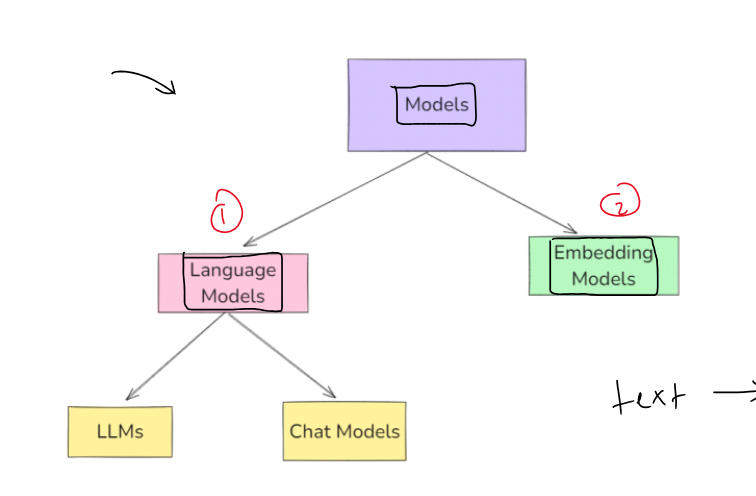

#### Plan of Action

1. Language Models
 - Open Source
 - Close Source
2. Embedding Models
- Open Source
- Close Source

#### Language Model

Language Models are AI systems designed to process, generate, and understand natural
language text

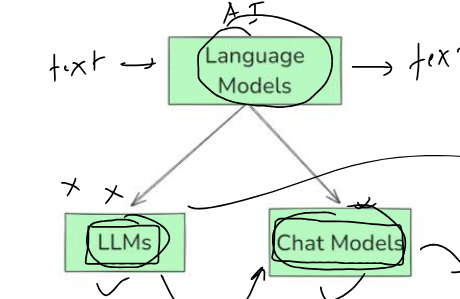

1. LLMs - General-purpose models that is used for raw text generation. They take a string(or plain
    text) as input and returns a string( plain text). These are traditionally older models and are not
    used much now.

2. Chat Models - Language models that are specialized for conversational tasks. They take a
    sequence of messages as inputs and return chat messages as outputs (as opposed to using
    plain text). These are traditionally newer models and used more in comparison to the LLMs.

    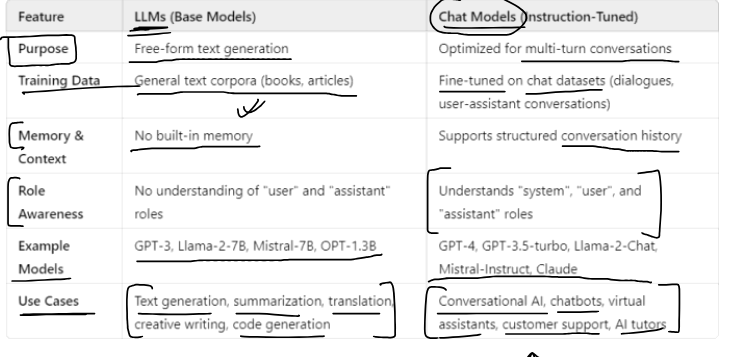


#### Plan of Action

1. Language Models
 - Open Source
 - Close Source
2. Embedding Models
- Open Source
- Close Source


## LLM


- OpenAI1.
- Anthropic2.
- Google3.
- HuggingFace

In [ ]:
# - Mistral
# - gpt-3

from langchain_openai import OpenAI
from dotenv import load_dotenv

load_dotenv()

llm = OpenAI(model='gpt-3.5-turbo-instruct')

result = llm.invoke("What is the capital of India")

print(result)

## Chat Models

1. Open AI

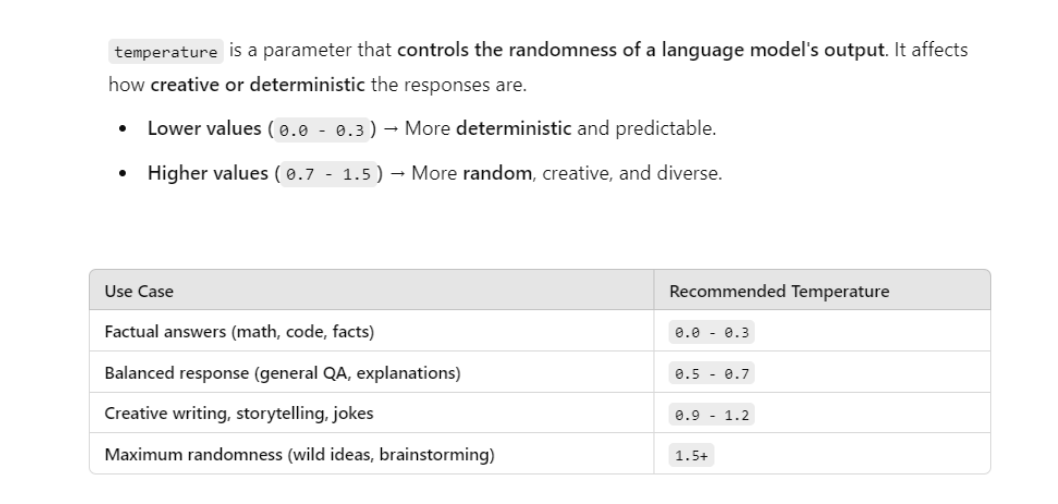

In [ ]:
from langchain_openai import ChatOpenAI
from dotenv import load_dotenv

load_dotenv()

model = ChatOpenAI(model='gpt-4', temperature=1.5, max_completion_tokens=10)

result = model.invoke("Write a 5 line poem on cricket")

print(result.content)

2. anthropic ( Claude AI )

In [ ]:
from langchain_anthropic import ChatAnthropic
from dotenv import load_dotenv

load_dotenv()

model = ChatAnthropic(model='claude-3-5-sonnet-20241022')

result = model.invoke('What is the capital of India')

print(result.content)

3. Google Gemini

In [ ]:
from langchain_google_genai import ChatGoogleGenerativeAI
from dotenv import load_dotenv

load_dotenv()

model = ChatGoogleGenerativeAI(model='gemini-1.5-pro')

result = model.invoke('What is the capital of India')

print(result.content)

## OpenSource:

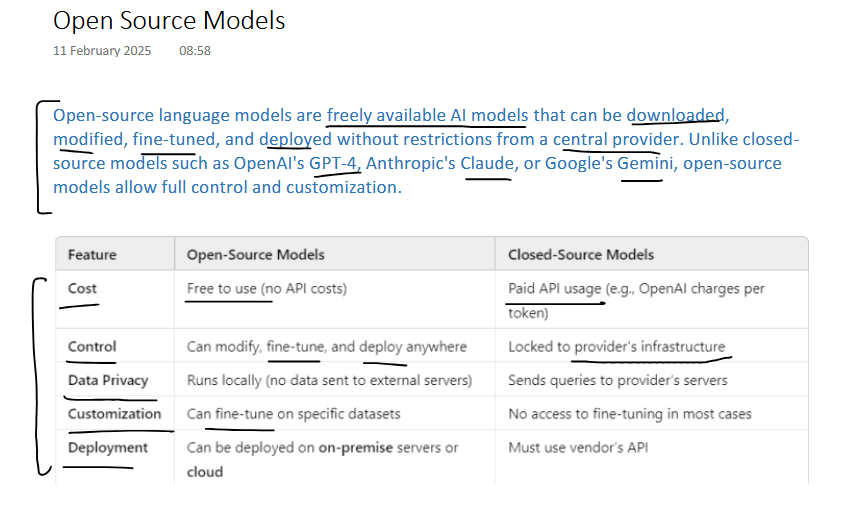

4. HuggingFace API

In [ ]:
from langchain_huggingface import ChatHuggingFace, HuggingFaceEndpoint
from dotenv import load_dotenv

load_dotenv()

llm = HuggingFaceEndpoint(
    repo_id="TinyLlama/TinyLlama-1.1B-Chat-v1.0",
    task="text-generation"
)

model = ChatHuggingFace(llm=llm)

result = model.invoke("What is the capital of India")

print(result.content)

5. HuggingFace Local ChatModel

In [ ]:
from langchain_huggingface import ChatHuggingFace, HuggingFacePipeline
import os

os.environ['HF_HOME'] = 'D:/huggingface_cache'

llm = HuggingFacePipeline.from_model_id(
    model_id='TinyLlama/TinyLlama-1.1B-Chat-v1.0',
    task='text-generation',
    pipeline_kwargs=dict(
        temperature=0.5,
        max_new_tokens=100
    )
)
model = ChatHuggingFace(llm=llm)

result = model.invoke("What is the capital of India")

print(result.content)

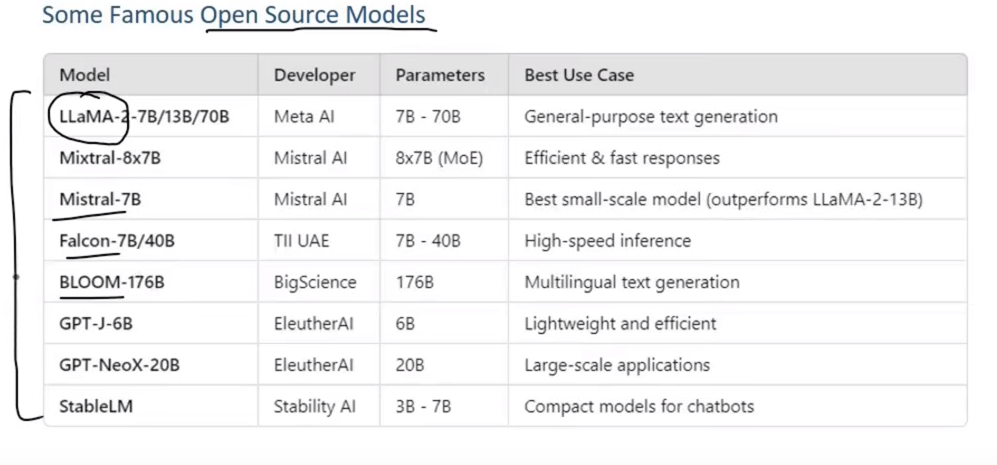

## Embedding Models

1. OpenAi ( Query ) Embedding Model

In [ ]:
from langchain_openai import OpenAIEmbeddings
from dotenv import load_dotenv

load_dotenv()

embedding = OpenAIEmbeddings(model='text-embedding-3-large', dimensions=32)

result = embedding.embed_query("Delhi is the capital of India")

print(str(result))

2. 1. OpenAi ( Document ) Embedding Model

In [ ]:
from langchain_openai import OpenAIEmbeddings
from dotenv import load_dotenv

load_dotenv()

embedding = OpenAIEmbeddings(model='text-embedding-3-large', dimensions=32)

documents = [
    "Delhi is the capital of India",
    "Kolkata is the capital of West Bengal",
    "Paris is the capital of France"
]

result = embedding.embed_documents(documents)

print(str(result))

3. HuggingFace Embedding model in ( Local machine )

In [ ]:
from langchain_huggingface import HuggingFaceEmbeddings

embedding = HuggingFaceEmbeddings(model_name='sentence-transformers/all-MiniLM-L6-v2')

documents = [
    "Delhi is the capital of India",
    "Kolkata is the capital of West Bengal",
    "Paris is the capital of France"
]

vector = embedding.embed_documents(documents)

print(str(vector))

4. Document Similarity using Embedding models

In [ ]:
from langchain_openai import OpenAIEmbeddings
from dotenv import load_dotenv
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

load_dotenv()

embedding = OpenAIEmbeddings(model='text-embedding-3-large', dimensions=300)

documents = [
    "Virat Kohli is an Indian cricketer known for his aggressive batting and leadership.",
    "MS Dhoni is a former Indian captain famous for his calm demeanor and finishing skills.",
    "Sachin Tendulkar, also known as the 'God of Cricket', holds many batting records.",
    "Rohit Sharma is known for his elegant batting and record-breaking double centuries.",
    "Jasprit Bumrah is an Indian fast bowler known for his unorthodox action and yorkers."
]

query = 'tell me about bumrah'

doc_embeddings = embedding.embed_documents(documents)
query_embedding = embedding.embed_query(query)

scores = cosine_similarity([query_embedding], doc_embeddings)[0]

index, score = sorted(list(enumerate(scores)),key=lambda x:x[1])[-1]

print(query)
print(documents[index])
print("similarity score is:", score)